## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the data
path = r"C:\Users\Pratyasha\Downloads\Leads.csv"
leads = pd.read_csv(path)

In [4]:
# See the data
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the shape
leads.shape

(9240, 37)

In [6]:
# See data types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: EDA

### Missing Value Treatment

In [7]:
# Lot of columns have values as Select, in many applications it is the drop down column default value, hence must be replaced by NaN
leads = leads.replace('Select',np.NaN)

In [8]:
# Null Values - Find the columns that have > 45% null
for col in leads.columns:
    per = leads[col].isnull().sum()/len(leads)
    if per >= 0.45:
        print(leads[col].name)

How did you hear about X Education
Lead Quality
Lead Profile
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score


In [9]:
# Null Values - Drop the columns that have > 45% null
for col in leads.columns:
    per = leads[col].isnull().sum()/len(leads)
    if per >= 0.45:
        leads.drop(col,axis=1,inplace=True)

#Get the current shape
leads.shape

(9240, 30)

In [10]:
# Null Values - How many columns still have null values
for col in leads.columns:
    per = round(100*(leads[col].isnull().sum()/len(leads)),2)
    if per > 0:
       print(leads[col].name, per)

Lead Source 0.39
TotalVisits 1.48
Page Views Per Visit 1.48
Last Activity 1.11
Country 26.63
Specialization 36.58
What is your current occupation 29.11
What matters most to you in choosing a course 29.32
Tags 36.29
City 39.71


In [11]:
# Find unique values and spread in Categorical column - Lead Source
leads['Lead Source'].value_counts(dropna = False, normalize = True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [12]:
# Merge sources with similar names/companies into larger
# Group low frequency values into 'Other_Lead_Sources'
leads['Lead Source'] = leads['Lead Source'].replace(['google','youtubechannel'],'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Referral Sites','Reference')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Other_Lead_Sources')
leads['Lead Source'] = leads['Lead Source'].replace(['Welingak Website','Facebook','bing','Click2call','Press_Release',
                                                     'Social Media','Live Chat','testone','Pay per Click Ads',
                                                    'welearnblog_Home','WeLearn','blog','NC_EDM'] ,'Other_Lead_Sources') 

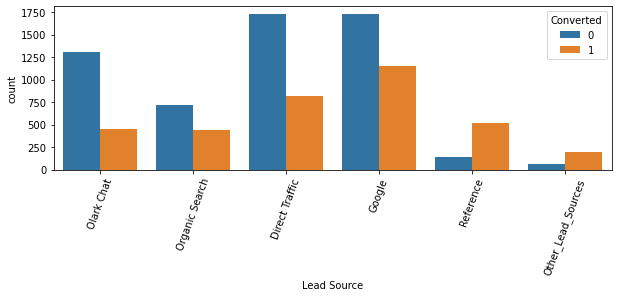

In [13]:
# Plot the Lead Source data against Converted
plt.figure(figsize=(10,3))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [14]:
# Find unique values and spread in Categorical column - Lead Activity
leads['Last Activity'].value_counts(dropna = False, normalize = True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [15]:
# Group low frequency <2% values into 'Others'
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Other_Activities')
leads['Last Activity'] = leads['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                'Had a Phone Conversation','Approached upfront',
                                                'View in browser link Clicked','Email Received','Email Marked Spam',
                                                'Visited Booth in Tradeshow','Resubscribed to emails'],'Other_Activities')

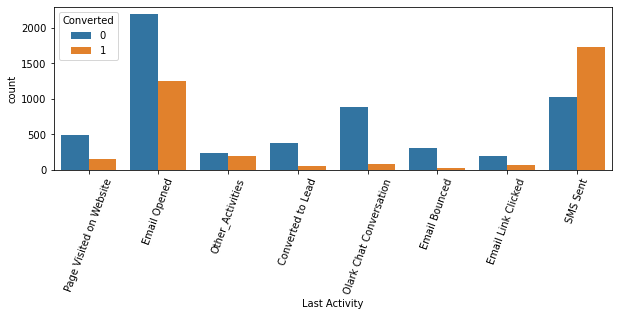

In [16]:
# Plot the Last Activity data against Converted
plt.figure(figsize=(10,3))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [17]:
# Find unique values and spread in Categorical column - Country
leads['Country'].value_counts(dropna = False, normalize = True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [18]:
# Country has 70% India, 26% NA and rest from around the world, we can impute India into NA
# Then country will will have 96% India and therefore it is imbalanced and must be dropped 
no_use = []
no_use.append('Country')
no_use

['Country']

In [19]:
# Find unique values and spread in Categorical column - Specialization
leads['Specialization'].value_counts(dropna = False, normalize = True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [20]:
# Mode is NA, so it cant be imputed 
# NA values can be considered as Specialization Not Selected, as these could be students not working in a specific industry
# Group low frequency <2% values into 'Other_Specializations'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Specialization Not Selected')
leads['Specialization'] = leads['Specialization'].replace(['International Business','Healthcare Management',
                                         'Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness',
                                         'E-Business','Services Excellence',],'Other_Specializations')

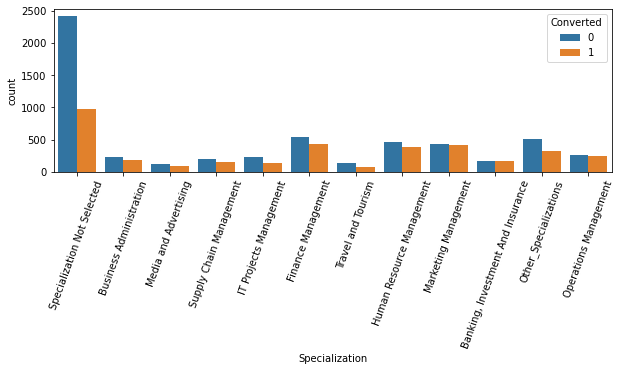

In [21]:
# Plot the Specialization data against Converted
plt.figure(figsize=(10,3))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [22]:
# Find unique values and spread in Categorical column - What is your current occupation
leads['What is your current occupation'].value_counts(dropna = False, normalize = True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [23]:
# Current Occupation has 60% Unemployed, 29% NA and rest as other professions, we can impute Unemployed into NA
# Then Current Occupation will will have 90% Unemployed and therefore it is imbalanced and must be dropped 
no_use.append('What is your current occupation')
no_use

['Country', 'What is your current occupation']

In [24]:
# Find unique values and spread in Categorical column - What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(dropna = False, normalize = True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# Course Selection Purpose has 70% Better Career Prospects, 29% NA, we can impute it into NA
# Then Course Selection Purpose will will have close to 100% Better Career Prospects and therefore it is imbalanced and must be dropped 
no_use.append('What matters most to you in choosing a course')
no_use

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [26]:
# Find unique values and spread in Categorical column - Tags
leads['Tags'].value_counts(dropna = False, normalize = True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [27]:
# Mode is NA, so it cant be imputed 
# NA values can be considered as Tag Not Selected
# Group similar looking tags together
# Group low frequency <2% values into 'Other_Tags'
leads['Tags'] = leads['Tags'].replace(np.nan,'Tag Not Selected')
leads['Tags'] = leads['Tags'].replace(['switched off','Busy','invalid number','wrong number given','opp hangup',
                                       'number not provided'], 'Unreachable')
leads['Tags'] = leads['Tags'].replace(['Lost to EINS','Not doing further education','Lost to Others',
                                      'Diploma holder (Not Eligible)','Lateral student'],'Lost')
leads['Tags'] = leads['Tags'].replace(['Interested  in full time MBA','Graduation in progress','in touch with EINS',
                                    'Still Thinking','Lateral student','Want to take admission but has financial problems',
                                    'In confusion whether part time or DLP','Interested in Next batch',
                                    'Shall take in the next coming month','University not recognized',
                                    'Recognition issue (DEC approval)'],'Other_Tags')

In [28]:
leads['Tags'].value_counts(dropna = False, normalize = True)

Tag Not Selected                       0.362879
Will revert after reading the email    0.224242
Ringing                                0.130195
Unreachable                            0.066667
Interested in other courses            0.055519
Already a student                      0.050325
Lost                                   0.042532
Closed by Horizzon                     0.038745
Other_Tags                             0.028896
Name: Tags, dtype: float64

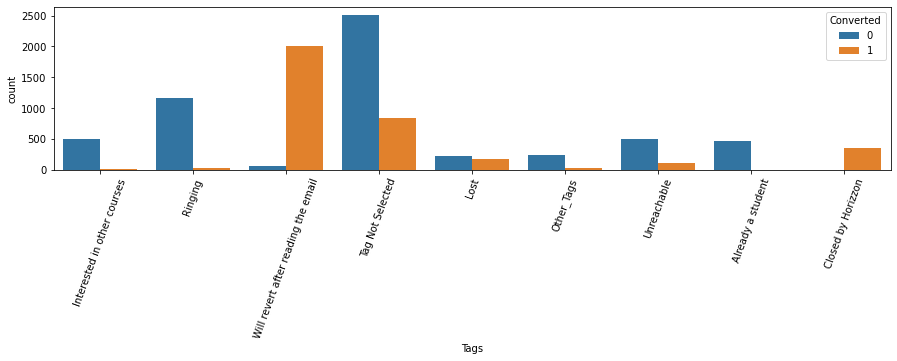

In [29]:
# Plot the Tags data against Converted
plt.figure(figsize=(15,3))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [30]:
# Find unique values and spread in Categorical column - City
leads['City'].value_counts(dropna = False, normalize = True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

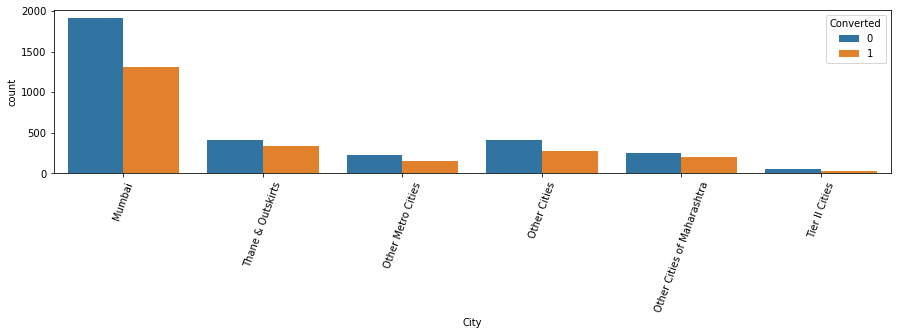

In [31]:
# Plot the City data against Converted
plt.figure(figsize=(15,3))
s1=sns.countplot(leads['City'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [32]:
# Mode is NA, but Mumbai is 2nd and not too far behind, so Mumbai can be imputed for NA 
# Thane and outskirts are adjacent to Mumbai, so they can be imputed by Mumbai
# Together these three are more than 80% hence due to imbalance we can delete the column
no_use.append('City')
no_use

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

In [33]:
# Drop the no use columns and see data set
leads.drop(no_use,axis=1,inplace=True)
leads.shape

(9240, 26)

In [34]:
#See the info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [35]:
# TotalVisits and Page Views Per Visit have same number of NA records
for col in leads.columns:
    per = round(100*(leads[col].isnull().sum()/len(leads)),2)
    if per > 0:
       print(leads[col].name, per)
leads[leads['TotalVisits'].isnull()] == leads[leads['Page Views Per Visit'].isnull()]

TotalVisits 1.48
Page Views Per Visit 1.48


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
79,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
81,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
88,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
120,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8107,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8434,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9015,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [36]:
# There are only 137 rows out of 9240 i.e. 1.48% that have NA values in 2 columns TotalVisits and Page Views Per Visit
# Delete these rows as this will not have much of an impact
leads = leads.dropna()

In [37]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9103 non-null   object 
 1   Lead Number                               9103 non-null   int64  
 2   Lead Origin                               9103 non-null   object 
 3   Lead Source                               9103 non-null   object 
 4   Do Not Email                              9103 non-null   object 
 5   Do Not Call                               9103 non-null   object 
 6   Converted                                 9103 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9103 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

### Imbalances

In [38]:
# Find unique values and spread in Categorical column - Lead Origin
leads['Lead Origin'].value_counts(dropna = False, normalize = True)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

In [39]:
# Find unique values and spread in Categorical column - Do Not Email
leads['Do Not Email'].value_counts(dropna = False, normalize = True)

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64

In [40]:
# Find unique values and spread in Categorical column - Do Not Call
leads['Do Not Call'].value_counts(dropna = False, normalize = True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [41]:
# Find unique values and spread in Categorical column - Search
leads['Search'].value_counts(dropna = False, normalize = True)

No     0.998462
Yes    0.001538
Name: Search, dtype: float64

In [42]:
# Find unique values and spread in Categorical column - Magazine
leads['Magazine'].value_counts(dropna = False, normalize = True)

No    1.0
Name: Magazine, dtype: float64

In [43]:
# Find unique values and spread in Categorical column - Newspaper Article
leads['Newspaper Article'].value_counts(dropna = False, normalize = True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [44]:
# Find unique values and spread in Categorical column - X Education Forums
leads['X Education Forums'].value_counts(dropna = False, normalize = True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [45]:
# Find unique values and spread in Categorical column - Newspaper
leads['Newspaper'].value_counts(dropna = False, normalize = True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [46]:
# Find unique values and spread in Categorical column - Digital Advertisement
leads['Digital Advertisement'].value_counts(dropna = False, normalize = True)

No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64

In [47]:
# Find unique values and spread in Categorical column - Through Recommendations
leads['Through Recommendations'].value_counts(dropna = False, normalize = True)

No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64

In [48]:
# Find unique values and spread in Categorical column - Receive More Updates About Our Courses
leads['Receive More Updates About Our Courses'].value_counts(dropna = False, normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [49]:
# Find unique values and spread in Categorical column - Update me on Supply Chain Content
leads['Update me on Supply Chain Content'].value_counts(dropna = False, normalize = True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [50]:
# Find unique values and spread in Categorical column - Get updates on DM Content
leads['Get updates on DM Content'].value_counts(dropna = False, normalize = True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [51]:
# Find unique values and spread in Categorical column - I agree to pay the amount through cheque
leads['I agree to pay the amount through cheque'].value_counts(dropna = False, normalize = True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [52]:
# Find unique values and spread in Categorical column - A free copy of Mastering The Interview
leads['A free copy of Mastering The Interview'].value_counts(dropna = False, normalize = True)

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64

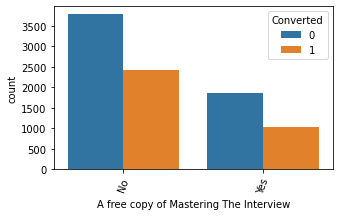

In [53]:
# Plot the A free copy of Mastering The Interview data against Converted
plt.figure(figsize=(5,3))
s1=sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [54]:
# Find unique values and spread in Categorical column - Last Notable Activity
leads['Last Notable Activity'].value_counts(dropna = False, normalize = True)

Modified                        0.359222
Email Opened                    0.310557
SMS Sent                        0.238603
Page Visited on Website         0.034934
Olark Chat Conversation         0.020103
Email Link Clicked              0.019005
Email Bounced                   0.006591
Unsubscribed                    0.005163
Unreachable                     0.003515
Had a Phone Conversation        0.001538
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

In [55]:
# Group low frequency <2% values into 'Others'
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                'Had a Phone Conversation','Email Marked Spam','Approached upfront',
                                                'Resubscribed to emails','View in browser link Clicked',
                                                'Form Submitted on Website','Email Received'],'Other_Last_Activities')

In [56]:
leads['Last Notable Activity'].value_counts(dropna = False, normalize = True)

Modified                   0.359222
Email Opened               0.310557
SMS Sent                   0.238603
Page Visited on Website    0.034934
Olark Chat Conversation    0.020103
Email Link Clicked         0.019005
Other_Last_Activities      0.017577
Name: Last Notable Activity, dtype: float64

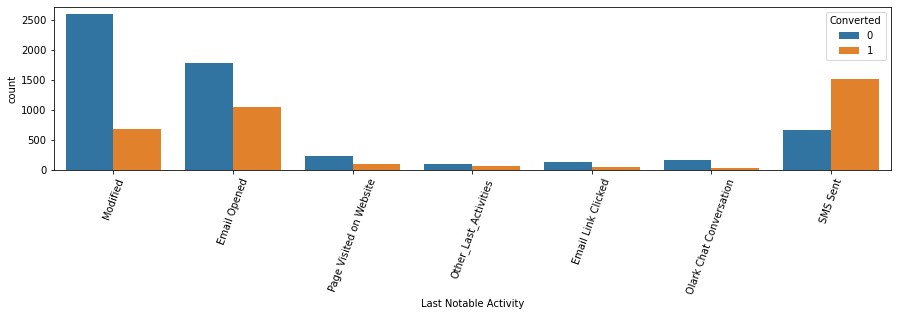

In [57]:
# Plot the Last Notable Activity against Converted
plt.figure(figsize=(15,3))
s1=sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=70)
plt.show()

In [58]:
#Add the columns that have high imbalance >90% to the list of columns that must be deleted
no_use = []
no_use.extend(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
              'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
              ])
no_use

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [59]:
# Drop the no use columns and see data set
leads.drop(no_use,axis=1,inplace=True)
leads.shape

(9103, 13)

In [60]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Numerical Data Analysis

In [61]:
#Check the numerical data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [62]:
# Max values are outliers, so see quantiles
print(leads['TotalVisits'].quantile([0.25,0.5,0.7,0.9,0.99]))
print(leads['Total Time Spent on Website'].quantile([0.25,0.5,0.7,0.9,0.99]))
print(leads['Page Views Per Visit'].quantile([0.25,0.5,0.7,0.9,0.99]))

0.25     1.0
0.50     3.0
0.70     4.0
0.90     7.0
0.99    17.0
Name: TotalVisits, dtype: float64
0.25       9.00
0.50     244.00
0.70     689.40
0.90    1372.00
0.99    1838.96
Name: Total Time Spent on Website, dtype: float64
0.25    1.0
0.50    2.0
0.70    3.0
0.90    5.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64


<AxesSubplot:title={'center':'Page Views Per Visit'}, xlabel='Converted', ylabel='Page Views Per Visit'>

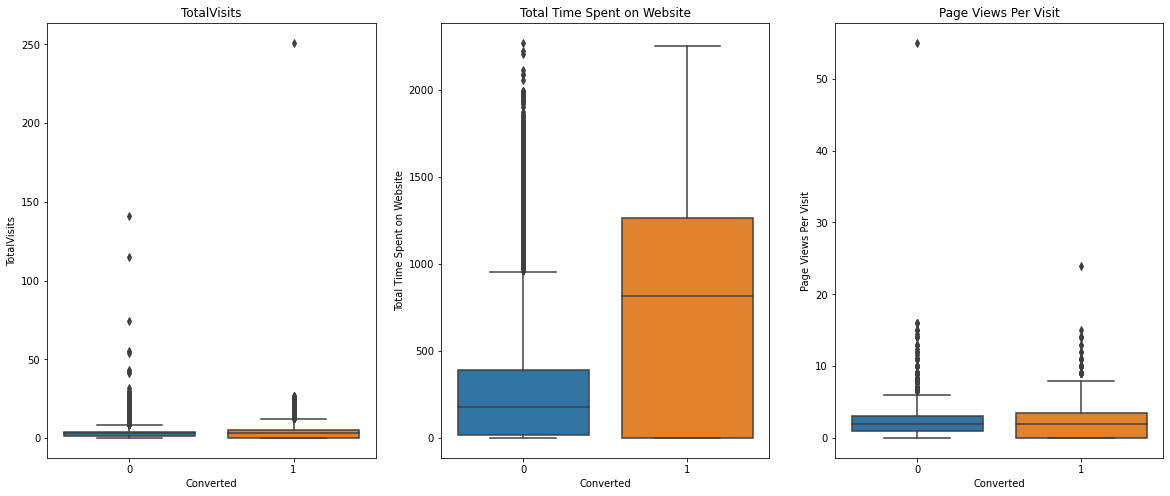

In [63]:
# See box plots of data
plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
plt.title('TotalVisits')
sns.boxplot(data = leads,x='Converted',y='TotalVisits')
plt.subplot(1,3,2)
plt.title('Total Time Spent on Website')
sns.boxplot(data = leads,x='Converted',y='Total Time Spent on Website')
plt.subplot(1,3,3)
plt.title('Page Views Per Visit')
sns.boxplot(data = leads,x='Converted',y='Page Views Per Visit')

In [64]:
# There are outliers that are not continous, but spread far from each other, so delete those records
leads = leads[leads['TotalVisits'] <= 40]
leads = leads[leads['Total Time Spent on Website'] <= 2000]
leads = leads[leads['Page Views Per Visit'] <= 20]

<AxesSubplot:title={'center':'Page Views Per Visit'}, xlabel='Converted', ylabel='Page Views Per Visit'>

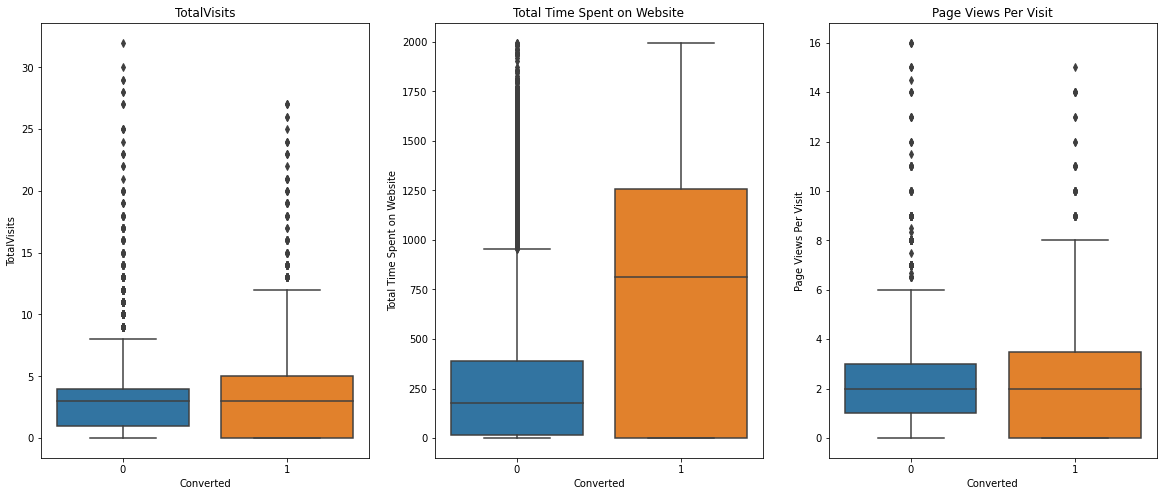

In [65]:
# See box plots of data again
plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
plt.title('TotalVisits')
sns.boxplot(data = leads,x='Converted',y='TotalVisits')
plt.subplot(1,3,2)
plt.title('Total Time Spent on Website')
sns.boxplot(data = leads,x='Converted',y='Total Time Spent on Website')
plt.subplot(1,3,3)
plt.title('Page Views Per Visit')
sns.boxplot(data = leads,x='Converted',y='Page Views Per Visit')

In [66]:
leads.shape

(9073, 13)

## Step 3: Dummy Variable

In [67]:
# A free copy of Mastering The Interview has 2 values, covert them to 1 and 0
leads[['A free copy of Mastering The Interview']] = leads[['A free copy of Mastering The Interview']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [68]:
# Creating a dummy variable for Lead Origin and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [69]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
# Dropping LeadSource_Other_Lead_Sources column
ls1 = ls.drop(['LeadSource_Other_Lead_Sources'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ls1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads['Last Activity'], prefix='LastActivity')
# Dropping LastActivity_Other_Activities column
la1 = la.drop(['LastActivity_Other_Activities'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping Specialization_Specialization Not Selected column
sp1 = sp.drop(['Specialization_Specialization Not Selected'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,sp1], axis=1)

# Creating dummy variables for the variable 'Tags'
tg = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping Tags_Tag Not Selected column
tg1 = tg.drop(['Tags_Tag Not Selected'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
na = pd.get_dummies(leads['Last Notable Activity'], prefix='LastNA')
# Dropping LastNA_Other_Last_Activities column
na1 = na.drop(['LastNA_Other_Last_Activities'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,na1], axis=1)

In [70]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Tags', 'Last Notable Activity'], 1)

In [71]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9073 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9073 non-null   object 
 1   Lead Number                                       9073 non-null   int64  
 2   Converted                                         9073 non-null   int64  
 3   TotalVisits                                       9073 non-null   float64
 4   Total Time Spent on Website                       9073 non-null   int64  
 5   Page Views Per Visit                              9073 non-null   float64
 6   A free copy of Mastering The Interview            9073 non-null   int64  
 7   Lead Origin_Landing Page Submission               9073 non-null   uint8  
 8   Lead Origin_Lead Add Form                         9073 non-null   uint8  
 9   Lead Origin_Lead Im

In [72]:
# See the data
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost,Tags_Other_Tags,Tags_Ringing,Tags_Unreachable,Tags_Will revert after reading the email,LastNA_Email Link Clicked,LastNA_Email Opened,LastNA_Modified,LastNA_Olark Chat Conversation,LastNA_Page Visited on Website,LastNA_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [73]:
### Checking the Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.98082221977295

## Step 4: Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost,Tags_Other_Tags,Tags_Ringing,Tags_Unreachable,Tags_Will revert after reading the email,LastNA_Email Link Clicked,LastNA_Email Opened,LastNA_Modified,LastNA_Olark Chat Conversation,LastNA_Page Visited on Website,LastNA_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [76]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 7114 to 5751
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6351 non-null   float64
 1   Total Time Spent on Website                       6351 non-null   int64  
 2   Page Views Per Visit                              6351 non-null   float64
 3   A free copy of Mastering The Interview            6351 non-null   int64  
 4   Lead Origin_Landing Page Submission               6351 non-null   uint8  
 5   Lead Origin_Lead Add Form                         6351 non-null   uint8  
 6   Lead Origin_Lead Import                           6351 non-null   uint8  
 7   LeadSource_Direct Traffic                         6351 non-null   uint8  
 8   LeadSource_Google                                 6351 non-null   uint8  
 9   LeadSource_Olark

## Step 5: Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
# Apply scaler to three columns 
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [81]:
# See scaled data
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost,Tags_Other_Tags,Tags_Ringing,Tags_Unreachable,Tags_Will revert after reading the email,LastNA_Email Link Clicked,LastNA_Email Opened,LastNA_Modified,LastNA_Olark Chat Conversation,LastNA_Page Visited on Website,LastNA_SMS Sent
7114,-0.103440,-0.704763,0.320846,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4744,-0.976650,-0.875711,-1.121681,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7986,-0.976650,-0.875711,-1.121681,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1283,4.262614,2.008334,1.042110,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7346,0.187631,0.874200,-0.640838,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Step 6: Model Building

In [82]:
import statsmodels.api as sm

In [83]:
# Logistic regression model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.0
Date:                Tue, 18 Oct 2022   Deviance:                       2704.0
Time:                        10:11:43   Pearson chi2:                 7.08e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7201      0.687      1.048      0.295      -0.627       2.067
TotalVisits                                          0.2116      0.075      2.841      0.005       0.066       0.358
Total Time Spent on Website                          1.1576      0.059     19.697      0.000       1.042       1.273
Page Views Per Visit                                -0.1554      0.081     -1.908      0.056      -0.315       0.004
A free copy of Mastering The Interview               0.0582      0.163      0.358      0.720      -0.260       0.377
Lead Origin_Landing Page Submission                 -0.2838      0.222     -1.276      0.202      -0.720       0.152
Lead Origin_Lead Add Form                            2.5484      0.543      4.695      0.000       1.485       3.612
Lead Origin_Lead Import                             -0.5602      0.992     -0.565      0.572      -2.504       1.384
LeadSource_Direct Traffic                           -2.1392      0.577     -3.710      0.000      -3.269      -1.009
LeadSource_Google                                   -1.9794      0.566     -3.496      0.000      -3.089      -0.870
LeadSource_Olark Chat                               -0.7608      0.581     -1.309      0.191      -1.900       0.379
LeadSource_Organic Search                           -1.9375      0.577     -3.358      0.001      -3.068      -0.807
LeadSource_Reference                                -2.2904      0.528     -4.341      0.000      -3.325      -1.256
LastActivity_Converted to Lead                      -0.6329      0.459     -1.378      0.168      -1.533       0.267
LastActivity_Email Bounced                          -2.0450      0.520     -3.934      0.000      -3.064      -1.026
LastActivity_Email Link Clicked                      0.5115      0.617      0.829      0.407      -0.697       1.720
LastActivity_Email Opened                            0.3626      0.390      0.930      0.352      -0.402       1.127
LastActivity_Olark Chat Conversation                -0.8532      0.416     -2.052      0.040      -1.668      -0.038
LastActivity_Page Visited on Website                -0.9093      0.458     -1.988      0.047      -1.806      -0.013
LastActivity_SMS Sent                                1.0535      0.381      2.762      0.006       0.306       1.801
Specialization_Banking, Investment And Insurance    -0.0119      0.355     -0.034      0.973      -0.707       0.683
Specialization_Business Administration              -0.1540      0.316     -0.487      0.626      -0.773       0.466
Specialization_Finance Management                   -0.1647      0.268     -0.615      0.539      -0.690       0.360
Specialization_Human Resource Management 

#### There are a lot of variables with high p values, hence we must select features 

## Step 8: Feature Selection Using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
# Running RFE with 16 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 16)             
rfe = rfe.fit(X_train, y_train)

In [86]:
# What columns got selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Olark Chat', False, 27),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Reference', True, 1),
 ('LastActivity_Converted to Lead', True, 1),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', False, 14),
 ('LastActivity_Email Opened', False, 11),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Page Visited on Website', False, 3),
 ('LastActivity_SMS Sent', False, 4),
 ('Specialization_Banking, Investment And Insurance', False, 26),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_Finance Management', False, 24),
 ('Specializa

In [87]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost', 'Tags_Ringing', 'Tags_Will revert after reading the email',
       'LastNA_SMS Sent'],
      dtype='object')

In [88]:
# Features not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'LeadSource_Olark Chat', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Page Visited on Website',
       'LastActivity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Other_Specializations',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Tags_Other_Tags',
       'Tags_Unreachable', 'LastNA_Email Link Clicked', 'LastNA_Email Opened',
       'LastNA_Modified', 'L

## Step 9: Use columns generated from RFE in model and recursively improve it after checking p values and VIF

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.7
Date:                Tue, 18 Oct 2022   Deviance:                       2841.5
Time:                        10:11:45   Pearson chi2:                 6.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5357      0.116     -4.634      0.000      -0.762      -0.309
Total Time Spent on Website                  1.1610      0.056     20.686      0.000       1.051       1.271
Lead Origin_Lead Add Form                    3.2374      0.369      8.762      0.000       2.513       3.962
LeadSource_Direct Traffic                   -1.9291      0.162    -11.907      0.000      -2.247      -1.612
LeadSource_Google                           -1.5580      0.152    -10.233      0.000      -1.856      -1.260
LeadSource_Organic Search                   -1.5952      0.185     -8.646      0.000      -1.957      -1.234
LeadSource_Reference                        -2.0184      0.399     -5.062      0.000      -2.800      -1.237
LastActivity_Converted to Lead              -1.3504      0.309     -4.368      0.000      -1.956      -0.744
LastActivity_Email Bounced                  -2.2475      0.426     -5.282      0.000      -3.082      -1.414
LastActivity_Olark Chat Conversation        -1.6046      0.210     -7.627      0.000      -2.017      -1.192
Tags_Already a student                      -3.1369      0.726     -4.322      0.000      -4.559      -1.714
Tags_Closed by Horizzon                      5.9954      0.724      8.283      0.000       4.577       7.414
Tags_Interested in other courses            -1.8470      0.377     -4.898      0.000      -2.586      -1.108
Tags_Lost                                    1.8672      0.171     10.911      0.000       1.532       2.203
Tags_Ringing                                -2.9250      0.224    -13.036      0.000      -3.365      -2.485
Tags_Will revert after reading the email     4.7586      0.188     25.250      0.000       4.389       5.128
LastNA_SMS Sent                              2.0923      0.119     17.600      0.000       1.859       2.325
============================================================================================================
"""

In [90]:
# Let us see predicted values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.0085012 , 0.63175912, 0.0408119 , 0.99913478, 0.99689639,
       0.98816921, 0.9610642 , 0.00138877, 0.28939769, 0.03622944])

In [91]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID
0,0,0.008501,7114
1,0,0.631759,4744
2,0,0.040812,7986
3,1,0.999135,1283
4,1,0.996896,7346


In [92]:
# Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the data
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.008501,7114,0
1,0,0.631759,4744,1
2,0,0.040812,7986,0
3,1,0.999135,1283,1
4,1,0.996896,7346,1


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3771  183]
 [ 346 2051]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9167060305463707


In [96]:
# Other metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
print('Sensitivity          : ',TP / float(TP+FN))
print('Specificity          : ',TN / float(TN+FP))
print('False +ve rate       : ',FP / float(TN+FP))
print('+ve predictive value : ',TP / float(TP+FP))

Sensitivity          :  0.8556528994576554
Specificity          :  0.9537177541729894
False +ve rate       :  0.04628224582701062
+ve predictive value :  0.9180841539838854


In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,2.70
5,LeadSource_Reference,2.54
14,Tags_Will revert after reading the email,1.75
2,LeadSource_Direct Traffic,1.57
15,LastNA_SMS Sent,1.54
3,LeadSource_Google,1.53
13,Tags_Ringing,1.33
0,Total Time Spent on Website,1.29
4,LeadSource_Organic Search,1.24
10,Tags_Closed by Horizzon,1.21


#### Let us drop the feature with higest VIF and see if there is any improvement

In [100]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'LastNA_SMS Sent'],
      dtype='object')

In [101]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1479.9
Date:                Tue, 18 Oct 2022   Deviance:                       2959.7
Time:                        10:11:46   Pearson chi2:                 6.85e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2354      0.107     -2.191      0.028      -0.446      -0.025
Total Time Spent on Website                  1.1326      0.056     20.192      0.000       1.023       1.243
LeadSource_Direct Traffic                   -2.2495      0.158    -14.253      0.000      -2.559      -1.940
LeadSource_Google                           -1.8567      0.148    -12.558      0.000      -2.147      -1.567
LeadSource_Organic Search                   -1.8992      0.181    -10.487      0.000      -2.254      -1.544
LeadSource_Reference                        -0.4791      0.270     -1.775      0.076      -1.008       0.050
LastActivity_Converted to Lead              -1.3913      0.312     -4.461      0.000      -2.003      -0.780
LastActivity_Email Bounced                  -2.2639      0.424     -5.336      0.000      -3.096      -1.432
LastActivity_Olark Chat Conversation        -1.8756      0.208     -9.011      0.000      -2.284      -1.468
Tags_Already a student                      -3.2152      0.727     -4.425      0.000      -4.639      -1.791
Tags_Closed by Horizzon                      6.3817      0.724      8.815      0.000       4.963       7.801
Tags_Interested in other courses            -2.0739      0.388     -5.348      0.000      -2.834      -1.314
Tags_Lost                                    1.9588      0.167     11.731      0.000       1.632       2.286
Tags_Ringing                                -2.9007      0.221    -13.124      0.000      -3.334      -2.468
Tags_Will revert after reading the email     4.8289      0.189     25.594      0.000       4.459       5.199
LastNA_SMS Sent                              2.1365      0.116     18.446      0.000       1.910       2.364
============================================================================================================
"""

In [102]:
# Let us see predicted values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.00693401, 0.71284055, 0.04298563, 0.99918007, 0.9971665 ,
       0.95781381, 0.97344469, 0.00128917, 0.28248415, 0.03622402])

In [103]:
# Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the data
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.008501,7114,0
1,0,0.631759,4744,1
2,0,0.040812,7986,0
3,1,0.999135,1283,1
4,1,0.996896,7346,1


In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3771  183]
 [ 346 2051]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9167060305463707


In [106]:
# Other metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
print('Sensitivity          : ',TP / float(TP+FN))
print('Specificity          : ',TN / float(TN+FP))
print('False +ve rate       : ',FP / float(TN+FP))
print('+ve predictive value : ',TP / float(TP+FP))

Sensitivity          :  0.8556528994576554
Specificity          :  0.9537177541729894
False +ve rate       :  0.04628224582701062
+ve predictive value :  0.9180841539838854


In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,1.72
1,LeadSource_Direct Traffic,1.57
2,LeadSource_Google,1.53
14,LastNA_SMS Sent,1.51
4,LeadSource_Reference,1.36
12,Tags_Ringing,1.33
0,Total Time Spent on Website,1.25
3,LeadSource_Organic Search,1.24
9,Tags_Closed by Horizzon,1.16
10,Tags_Interested in other courses,1.13


In [109]:
# Though VIF are under limit, but reduce a column to see performance improvement
col = col.drop('Tags_Will revert after reading the email', 1)
col

Index(['Total Time Spent on Website', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost', 'Tags_Ringing',
       'LastNA_SMS Sent'],
      dtype='object')

In [110]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2237.6
Date:                Tue, 18 Oct 2022   Deviance:                       4475.1
Time:                        10:11:46   Pearson chi2:                 7.60e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.4024      0.091      4.427      0.000       0.224       0.581
Total Time Spent on Website              1.1621      0.046     25.478      0.000       1.073       1.251
LeadSource_Direct Traffic               -1.5676      0.123    -12.727      0.000      -1.809      -1.326
LeadSource_Google                       -1.2614      0.116    -10.881      0.000      -1.489      -1.034
LeadSource_Organic Search               -1.2947      0.143     -9.080      0.000      -1.574      -1.015
LeadSource_Reference                     1.4754      0.184      8.014      0.000       1.115       1.836
LastActivity_Converted to Lead          -1.1687      0.225     -5.204      0.000      -1.609      -0.729
LastActivity_Email Bounced              -2.3490      0.351     -6.701      0.000      -3.036      -1.662
LastActivity_Olark Chat Conversation    -2.0158      0.174    -11.616      0.000      -2.356      -1.676
Tags_Already a student                  -4.3064      0.723     -5.956      0.000      -5.724      -2.889
Tags_Closed by Horizzon                  4.9378      0.721      6.851      0.000       3.525       6.350
Tags_Interested in other courses        -3.5733      0.402     -8.885      0.000      -4.362      -2.785
Tags_Lost                                0.7382      0.159      4.647      0.000       0.427       1.050
Tags_Ringing                            -4.0880      0.218    -18.774      0.000      -4.515      -3.661
LastNA_SMS Sent                          2.0041      0.093     21.476      0.000       1.821       2.187
========================================================================================================
"""

In [111]:
# Let us see predicted values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.00521321, 0.80041217, 0.0671677 , 0.96910317, 0.89669428,
       0.70268676, 0.35085681, 0.00158007, 0.584553  , 0.12109697])

In [112]:
# Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the data
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.008501,7114,0
1,0,0.631759,4744,1
2,0,0.040812,7986,0
3,1,0.999135,1283,1
4,1,0.996896,7346,1


In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3771  183]
 [ 346 2051]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9167060305463707


In [115]:
# Other metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
print('Sensitivity          : ',TP / float(TP+FN))
print('Specificity          : ',TN / float(TN+FP))
print('False +ve rate       : ',FP / float(TN+FP))
print('+ve predictive value : ',TP / float(TP+FP))

Sensitivity          :  0.8556528994576554
Specificity          :  0.9537177541729894
False +ve rate       :  0.04628224582701062
+ve predictive value :  0.9180841539838854


#### Accuracy is still the same with reduced columns

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LeadSource_Direct Traffic,1.46
2,LeadSource_Google,1.39
13,LastNA_SMS Sent,1.38
12,Tags_Ringing,1.25
0,Total Time Spent on Website,1.21
3,LeadSource_Organic Search,1.19
4,LeadSource_Reference,1.18
7,LastActivity_Olark Chat Conversation,1.12
9,Tags_Closed by Horizzon,1.12
10,Tags_Interested in other courses,1.12


### p values in model 4 are all 0, VIF are under limit, so we will go ahead with model 4

## Step 10: Plottig the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
#Pass current data to get metrices
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

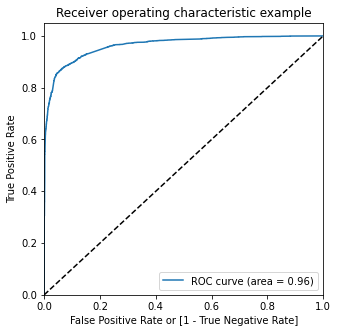

In [120]:
# Draw the curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The curve follows the left-hand border closely and then the top border of the ROC space therefore the test is more accurate and the model built is good.

## Step 11: Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008501,7114,0,1,0,0,0,0,0,0,0,0,0
1,0,0.631759,4744,1,1,1,1,1,1,1,1,0,0,0
2,0,0.040812,7986,0,1,0,0,0,0,0,0,0,0,0
3,1,0.999135,1283,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996896,7346,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Now let's calculate Accuracy Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy    = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[i,accuracy,sensitivity,specificity]

# Display the data
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.377421     1.000000     0.000000
0.1          0.1  0.826799     0.966208     0.742286
0.2          0.2  0.880964     0.926158     0.853566
0.3          0.3  0.896552     0.897789     0.895802
0.4          0.4  0.912455     0.874844     0.935255
0.5          0.5  0.916706     0.855653     0.953718
0.6          0.6  0.913872     0.831039     0.964087
0.7          0.7  0.899386     0.773884     0.975468
0.8          0.8  0.891513     0.741761     0.982296
0.9          0.9  0.864746     0.653317     0.992919


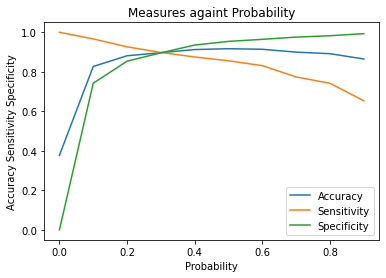

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.title('Measures againt Probability')
plt.ylabel('Accuracy Sensitivity Specificity')
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability

In [124]:
#Create a new column for this cutofff
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.008501,7114,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.631759,4744,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.040812,7986,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.999135,1283,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996896,7346,1,1,1,1,1,1,1,1,1,1,1,1


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.896551724137931

In [126]:
#New cutoff confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3542,  412],
       [ 245, 2152]], dtype=int64)

In [127]:
# Other metrics beyond accuracy
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
print('Sensitivity          : ',TP / float(TP+FN))
print('Specificity          : ',TN / float(TN+FP))
print('False +ve rate       : ',FP / float(TN+FP))
print('+ve predictive value : ',TP / float(TP+FP))

Sensitivity          :  0.8977889027951607
Specificity          :  0.8958017197774406
False +ve rate       :  0.10419828022255943
+ve predictive value :  0.8393135725429017


### Precision vs Recall

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

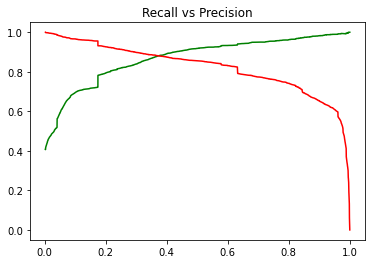

In [131]:
# Plot the threshholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Recall vs Precision')
plt.show()

### 0.35 derived from training model looks to be the optimum cutoff

### Lead Score Calculation

In [132]:
# Lead Score = Probability of conversion * 100
y_train_pred_final['Lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_score
0,0,0.008501,7114,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.631759,4744,1,1,1,1,1,1,1,1,0,0,0,1,63
2,0,0.040812,7986,0,1,0,0,0,0,0,0,0,0,0,0,4
3,1,0.999135,1283,1,1,1,1,1,1,1,1,1,1,1,1,100
4,1,0.996896,7346,1,1,1,1,1,1,1,1,1,1,1,1,100


## Step 12: Making predictions on the test set

In [133]:
# Scale the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [134]:
# Features to be used for tetsing the model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Olark Chat Conversation,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost,Tags_Ringing,LastNA_SMS Sent
4698,-0.787480,0,1,0,0,0,0,0,0,0,0,0,0,0
5539,-0.875711,0,0,0,0,0,0,1,0,0,1,0,0,0
5513,-0.300372,1,0,0,0,0,0,0,0,0,0,0,1,1
1344,-0.875711,0,0,0,0,0,0,0,0,0,0,0,0,0
4098,-0.655134,1,0,0,0,0,1,0,0,0,0,0,0,0


In [135]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [136]:
# Predict on test data
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4698    0.145029
5539    0.002017
5513    0.026645
1344    0.350857
4098    0.013714
569     0.187469
7011    0.350857
3429    0.350857
8801    0.977097
2429    0.358712
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4698,0.145029
5539,0.002017
5513,0.026645
1344,0.350857
4098,0.013714


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,4698,0.145029
1,0,5539,0.002017
2,0,5513,0.026645
3,1,1344,0.350857
4,0,4098,0.013714


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [144]:
# Rearranging the columns
y_pred_final.reindex(['ProspectID','Converted','Conversion_Prob'], axis=1)

,ProspectID,Converted,Conversion_Prob
0,4698,0,0.145029
1,5539,0,0.002017
2,5513,0,0.026645
3,1344,1,0.350857
4,4098,0,0.013714
...,...,...,...
2717,6334,0,0.176237
2718,4606,1,0.921051
2719,376,0,0.253119
2720,5786,0,0.001446


In [145]:
# Lead Score = Probability of conversion * 100
y_pred_final['Lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,Lead_score
0,0,4698,0.145029,15
1,0,5539,0.002017,0
2,0,5513,0.026645,3
3,1,1344,0.350857,35
4,0,4098,0.013714,1


In [146]:
# Create a new column for this cutofff
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,Lead_score,Final_Predicted
0,0,4698,0.145029,15,0
1,0,5539,0.002017,0,0
2,0,5513,0.026645,3,0
3,1,1344,0.350857,35,1
4,0,4098,0.013714,1,0


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8177810433504776

In [148]:
#Get the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion3

array([[1301,  372],
       [ 124,  925]], dtype=int64)

In [149]:
# Other metrics beyond accuracy
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [150]:
print('Sensitivity          : ',TP / float(TP+FN))
print('Specificity          : ',TN / float(TN+FP))
print('False +ve rate       : ',FP / float(TN+FP))
print('+ve predictive value : ',TP / float(TP+FP))

Sensitivity          :  0.8817921830314586
Specificity          :  0.7776449491930664
False +ve rate       :  0.22235505080693366
+ve predictive value :  0.7131842713955281


### Final Results

#### Training Data at 0.3 cutoff

* Accuracy    :  89.65%
* Sensitivity :  89.77%
* Specificity :  89.89%

#### Test Data at 0.35 cutoff

* Accuracy    :  81.77%
* Sensitivity :  88.17%
* Specificity :  77.76%

## Step 13: Feature importance

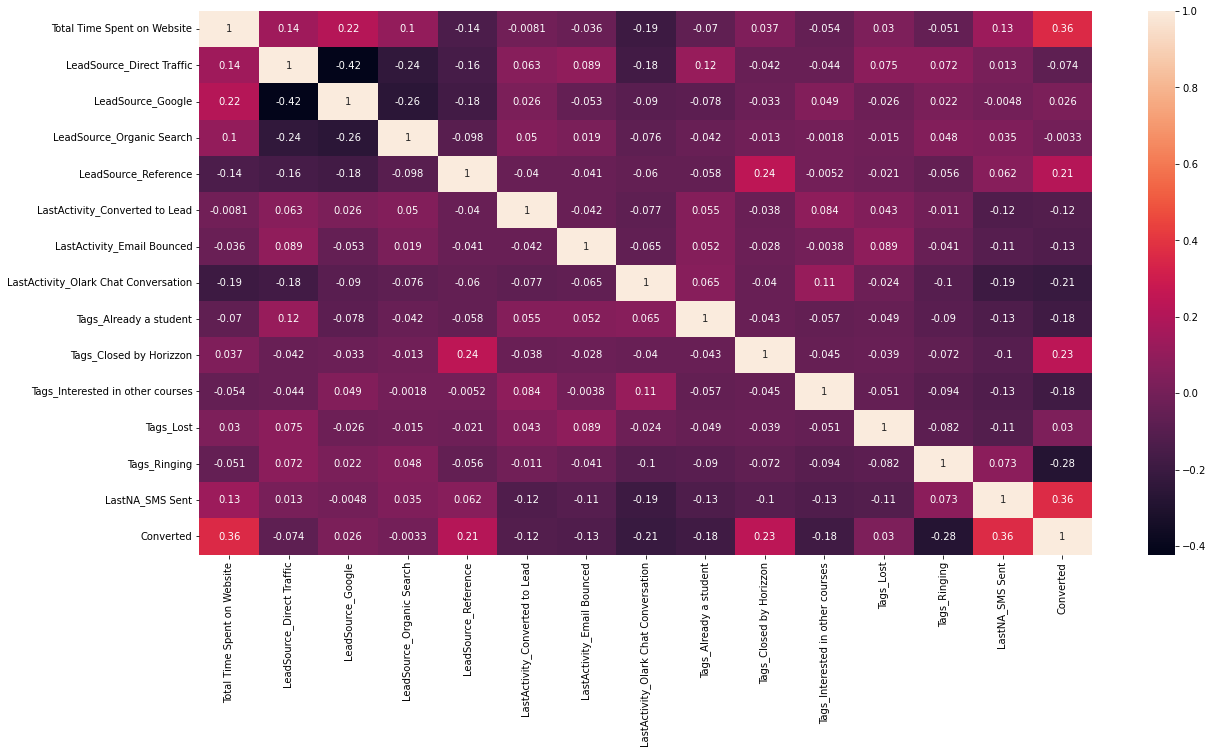

In [151]:
# Let's see the correlation matrix 
final_cols = []
final_cols = ['Total Time Spent on Website', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost', 'Tags_Ringing',
       'LastNA_SMS Sent', 'Converted']

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads[final_cols].corr(),annot = True)
plt.show()

In [152]:
from sklearn.decomposition import PCA

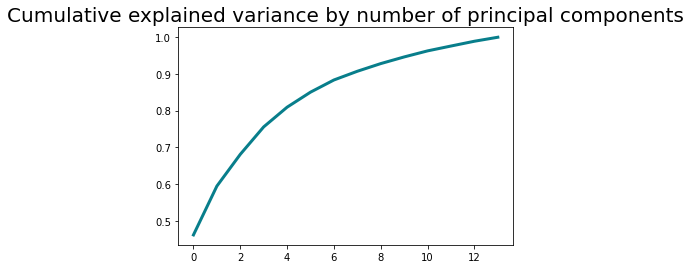

In [153]:
# Principal Component Analysis
pca = PCA().fit(X_train[col])

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [154]:
# PCA loadings
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train[col].columns) + 1)],
    index=X_train[col].columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Total Time Spent on Website,0.998144,0.016681,-0.032448,0.037084,-0.003316,0.022950,0.021802,-0.000317,0.005291,0.000887,0.004175,-0.004267,0.008370,0.003545
LeadSource_Direct Traffic,0.069745,0.372112,-0.037281,-0.211047,-0.005825,-0.012370,-0.060819,0.019371,-0.004964,-0.005885,-0.015030,0.036993,-0.046001,-0.040615
LeadSource_Google,0.116506,-0.392261,-0.009362,-0.198913,0.023720,-0.027632,-0.057313,0.001441,0.000815,-0.001879,-0.003258,0.038840,-0.043062,-0.037213
LeadSource_Organic Search,0.028722,0.019628,0.039897,0.258469,0.132744,-0.060902,-0.106793,0.004215,-0.000993,-0.006604,-0.005408,0.041374,-0.054992,-0.044723
LeadSource_Reference,-0.038473,0.002847,0.035196,0.042073,-0.050679,-0.036751,0.198082,0.022678,0.041211,0.021443,0.028378,0.043778,-0.025943,-0.077409


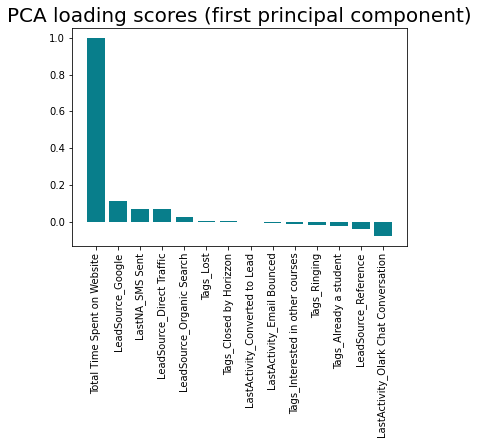

In [155]:
#Actual features from model 
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()